In [8]:
#Importamos las librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [11]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#Reemplazar el Outcome de 1 a 'Diab' y 0 a 'Non-Diab'
df.Outcome = df.Outcome.replace({"0":'Non-Diab', "1":'Diab'})
df.head()
#Completar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diab
1,1,85,66,29,0,26.6,0.351,31,Non-Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
3,1,89,66,23,94,28.1,0.167,21,Non-Diab
4,0,137,40,35,168,43.1,2.288,33,Diab


In [13]:
#Renombrar la columna DiabetesPedigreeFunction a DPF
df.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True)
df.head()
#Completar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diab
1,1,85,66,29,0,26.6,0.351,31,Non-Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
3,1,89,66,23,94,28.1,0.167,21,Non-Diab
4,0,137,40,35,168,43.1,2.288,33,Diab


In [26]:
#Verificamos los tipos de datos
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF                int64
Age                int64
Outcome           object
dtype: object

In [35]:
#Convertir a la variable: DPF en Integer y verificar su correcta conversion

#Completar

In [36]:
#Validacion cambio de dato

#Completar

In [22]:
#Shape
df.shape

(768, 9)

In [23]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    object 
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 54.1+ KB


In [15]:
#Estadisticos básicos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.0,3.0,6.00,17.0
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0


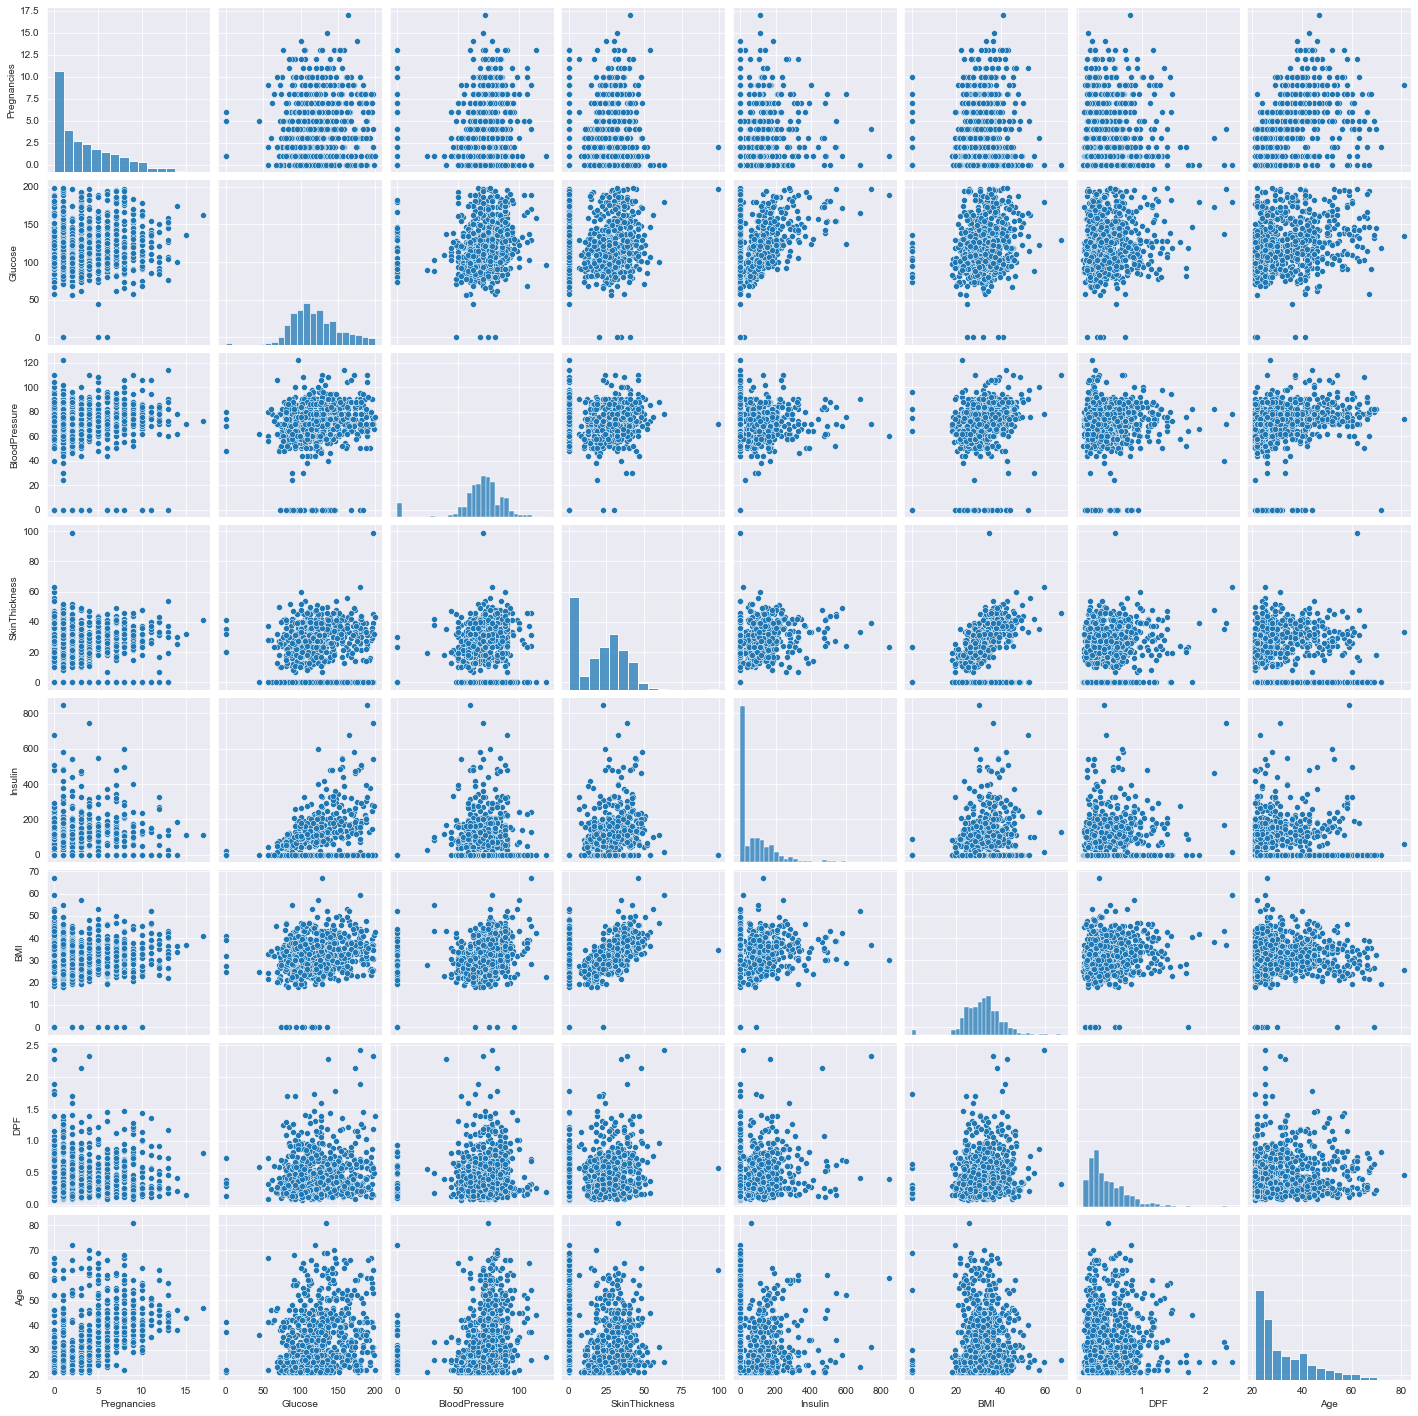

In [14]:
#Crear un Pairplot del dataset
sns.pairplot(df)
plt.show()
#Completar

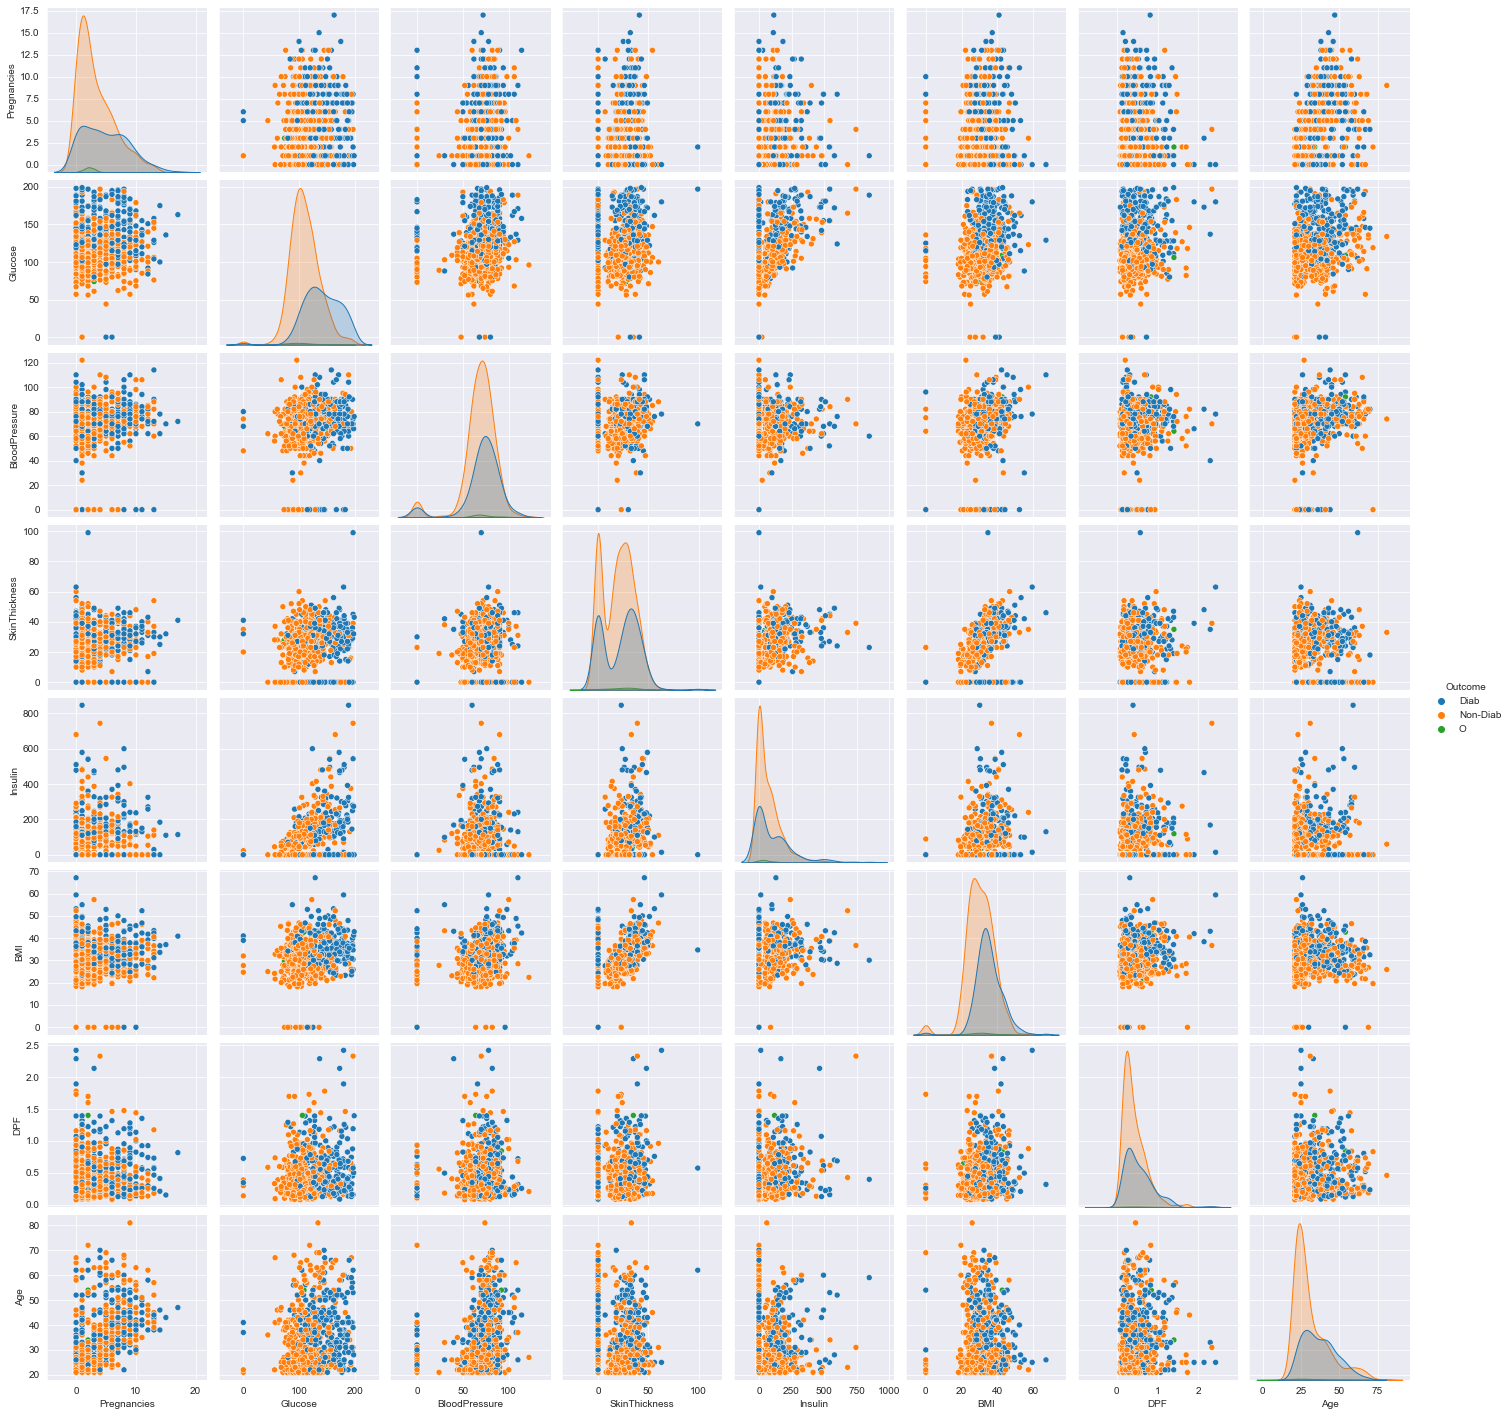

In [15]:
#Crear el Pairplot pero ahora con el atributo hue = 'Outcome'. Las leyendas deberán decir: 'Non Diabetic','Diabetic'
sns.pairplot(df, hue = 'Outcome')
plt.show()
#Completar

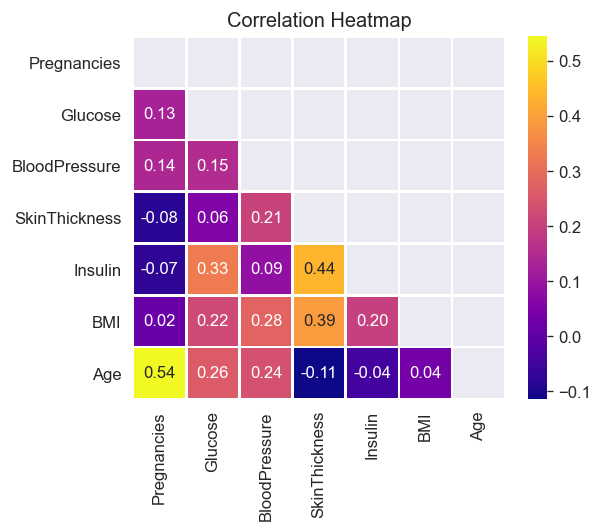

In [18]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Joint plot de Glucosa con otras variables ==> 

Correlacion entre Glucose y Pregnancies ==>  0.129458671499273


<Figure size 500x400 with 0 Axes>

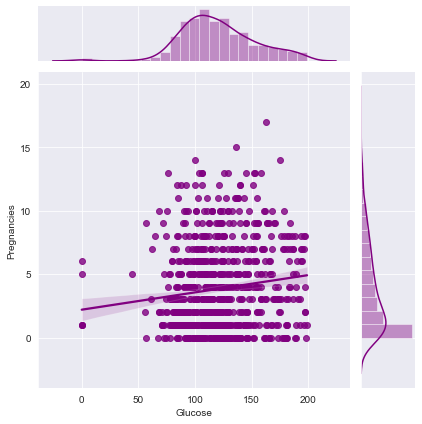

Correlacion entre Glucose y BloodPressure ==>  0.15258958656866448


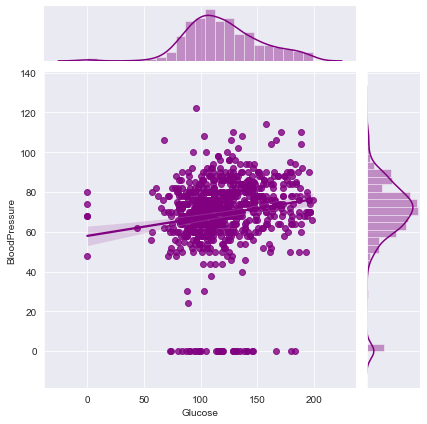

Correlacion entre Glucose y SkinThickness ==>  0.057327890738176825


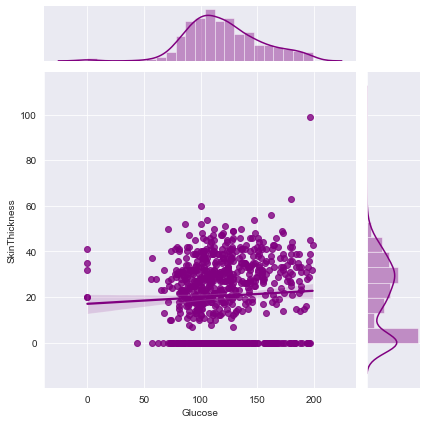

Correlacion entre Glucose y Insulin ==>  0.3313571099202081


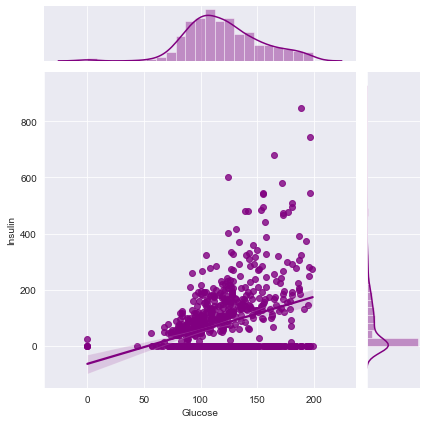

Correlacion entre Glucose y BMI ==>  0.22107106945898305


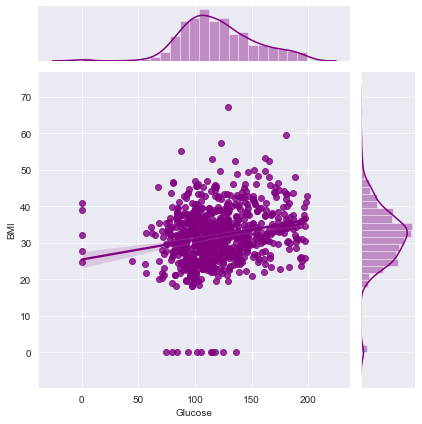

Correlacion entre Glucose y DPF ==>  0.129458671499273


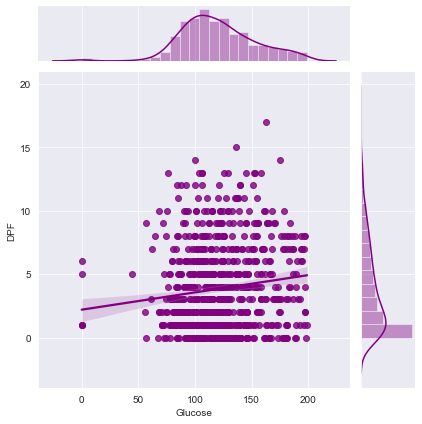

Correlacion entre Glucose y Age ==>  0.26351431982433376


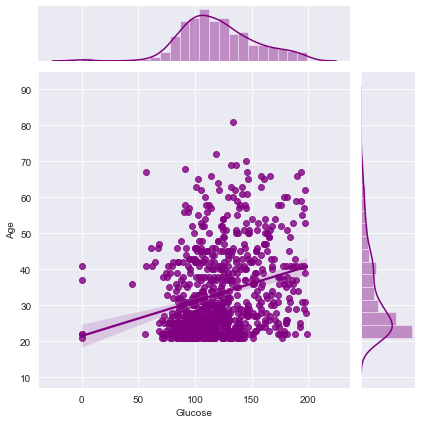

In [32]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Glucosa con otras variables ==> \n")
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlacion entre Glucose y {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'regression',color = 'purple')
        plt.show()

**Insight**: La glucosa muestra una asociación lineal débil positiva con las otras variables del conjunto de datos. Eso significa que al aumentar el nivel de glucosa en los pacientes, también aumentarán las otras variables.

In [39]:
#Crear el join plot entre BloodPressure y el resto de las variables con su correspondiente interpretación.

#Completar

**Insight**: Completar.

In [40]:
#Crear el join plot entre SkinThickness y el resto de las variables con su correspondiente interpretación.

#Completar

**Insight**: Completar.